# 1. import 불러오기 및 파일  불러오기

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/11세부 구성기술3 데이터분류_230503/분류할 엑셀 공구별/2. 동해-삼척 3공구/4. 분류 완료 파일/학습데이터_토공_231026_layer.csv")
df

,Unnamed: 0,sentence,lv3,lv4,lv7_1,lv7_2
0,0,"토공·R-I, F 작업로 보수 및 법면 정리",0,2,2,7
1,1,2공구 접속구간 공사용 진입도로 개설(STA.0+834 ~ STA.0+889),0,1,2,7
2,2,종점부 임목 파쇄(STA.0+834 ~ STA.0+889),0,1,2,7
3,3,종점부 벌목 및 세륜기 거푸집 조립(STA.0+834 ~ STA.0+889),0,1,2,7
4,4,2공구 접속구간 공사용 진입도로 개설(STA.0+834 ~ STA.0+889),0,1,2,7
...,...,...,...,...,...,...
579,579,Ramp-A1+020~1+180 L=160m,0,2,1,9
580,580,Ramp-A1+020~1+180 L=160m,0,2,1,9
581,581,R-A STA.0+698 성토,0,2,1,9
582,582,R-A STA.0+698 성토,0,2,1,9


## 3.2 모델링

### 3.2.1 ML Mode


### 3.2.2 TF-IDF vectorization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Define TF-IDF vectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['sentence'])

# Split data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.20, random_state=42)

target_columns = ['lv4', 'lv7_1', 'lv7_2']

# Split the labels into training and testing sets
y = df[target_columns]
y_train, y_test = train_test_split(y, test_size=0.20, random_state=42)

In [ ]:
print(X_train)

  (0, 287)	0.8760326202170999
  (0, 130)	0.48225185154187067
  (1, 249)	0.7062463902139926
  (1, 204)	0.4738903018487798
  (1, 411)	0.5259695980980053
  (2, 85)	0.48174006618846116
  (2, 81)	0.4569028534388051
  (2, 238)	0.2747162689309169
  (2, 111)	0.48174006618846116
  (2, 224)	0.4684313702459448
  (2, 134)	0.17943194456711112
  (3, 378)	0.4144886993010685
  (3, 377)	0.4253829464906188
  (3, 241)	0.31117625007795136
  (3, 266)	0.5329676455105749
  (3, 235)	0.5161039596951436
  (4, 133)	0.42644357205837996
  (4, 131)	0.42644357205837996
  (4, 353)	0.33718636615957315
  (4, 183)	0.397554880782121
  (4, 245)	0.397554880782121
  (4, 205)	0.3192806455767312
  (4, 302)	0.32335308421138287
  (5, 293)	0.5103995825366529
  (5, 228)	0.48202273286849306
  :	:
  (461, 92)	0.463200276851926
  (461, 262)	0.25457715780581947
  (461, 134)	0.1670675684389075
  (462, 130)	0.448473808084503
  (462, 187)	0.6776838565194103
  (462, 262)	0.582765676816303
  (463, 257)	0.690730862532442
  (463, 168)	0.723

### 3.2.3 Model Building

### 3.2.4 Model Evaluation

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support

# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/11세부 구성기술3 데이터분류_230503/분류할 엑셀 공구별/2. 동해-삼척 3공구/4. 분류 완료 파일/학습데이터_토공_231026_layer.csv")

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentence'])

# 데이터 분할
X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)

target_columns = ['lv4', 'lv7_1', 'lv7_2']
y = df[target_columns]
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

# 모델 정의
nb_base = MultinomialNB()
svm_base = LinearSVC()
rf_base = RandomForestClassifier()
gb_base = GradientBoostingClassifier()
xgb_base = XGBClassifier()

models = {
    'Multinomial Naive Bayes': nb_base,
    'Support Vector Machine': svm_base,
    'Random Forest': rf_base,
    'Gradient Boosting': gb_base,
    'XGBoost': xgb_base
}

results = {}
trained_models = {}
for name, model in models.items():
    clf = MultiOutputClassifier(model).fit(X_train, y_train)
    trained_models[name] = clf  # 학습된 모델 저장
    predictions = clf.predict(X_test)

    # 저장할 metrics 초기화
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # 각 레이블에 대한 precision, recall, f1, accuracy 값을 계산
    for idx, col in enumerate(target_columns):
        accuracy = accuracy_score(y_test[col], predictions[:, idx])
        precision, recall, f1, _ = precision_recall_fscore_support(y_test[col], predictions[:, idx], average='macro', zero_division=0)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    results[name] = {
        'accuracy': accuracies,
        'precision': precisions,
        'recall': recalls,
        'f1': f1_scores
    }

# 결과 출력
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, values in metrics.items():
        print(f"  {metric}: {values}")

Model: Multinomial Naive Bayes
  accuracy: [0.9041095890410958, 0.8835616438356164, 0.7191780821917808]
  precision: [0.9280303030303031, 0.8824746960272222, 0.8893772893772894]
  recall: [0.8149055552352952, 0.8672299027137736, 0.5874007936507937]
  f1: [0.8461237217648486, 0.8741582491582491, 0.6369486887747758]
Model: Support Vector Machine
  accuracy: [0.9041095890410958, 0.952054794520548, 0.8972602739726028]
  precision: [0.9177628857450153, 0.9655813953488371, 0.9002309284917981]
  recall: [0.892512634269134, 0.940757808499744, 0.9234457671957672]
  f1: [0.9011231783161607, 0.9518073782831235, 0.9068376068376068]
Model: Random Forest
  accuracy: [0.910958904109589, 0.910958904109589, 0.8835616438356164]
  precision: [0.923076923076923, 0.9205403791610688, 0.908813725005629]
  recall: [0.9000883918448915, 0.8963133640552995, 0.8963624338624339]
  f1: [0.9069875776397516, 0.9063892223556089, 0.8941215932914046]
Model: Gradient Boosting
  accuracy: [0.8972602739726028, 0.9178082191

In [ ]:
# 각 모델의 메트릭 평균 값 계산
avg_metrics = {}
for model_name, metrics in results.items():
    avg_metrics[model_name] = {}
    for metric_name, metric_values in metrics.items():
        avg_metrics[model_name][metric_name] = np.mean(metric_values)

# 평균 성능 지표 출력
avg_metrics_df = pd.DataFrame.from_dict(avg_metrics, orient='index')
print(avg_metrics_df)

                         accuracy  precision    recall        f1
Multinomial Naive Bayes  0.835616   0.899961  0.756512  0.785744
Support Vector Machine   0.917808   0.927858  0.918905  0.919923
Random Forest            0.901826   0.917477  0.897588  0.902499
Gradient Boosting        0.899543   0.924047  0.896888  0.907202
XGBoost                  0.867580   0.895323  0.843908  0.862060


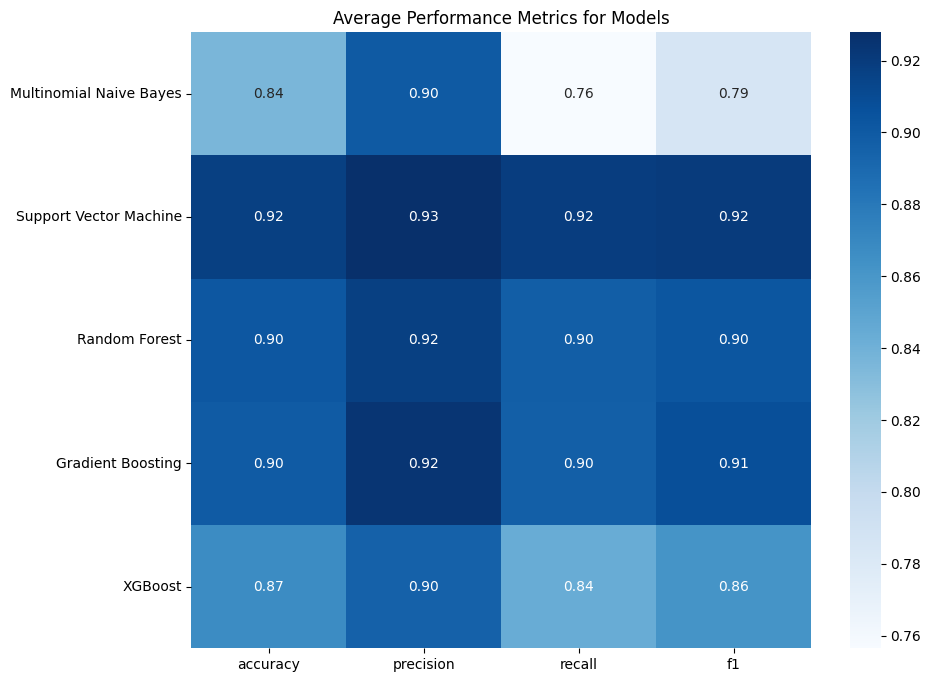

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the avg_metrics_df directly for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(avg_metrics_df, cmap='Blues', annot=True, fmt='.2f')
plt.title('Average Performance Metrics for Models')
plt.show()

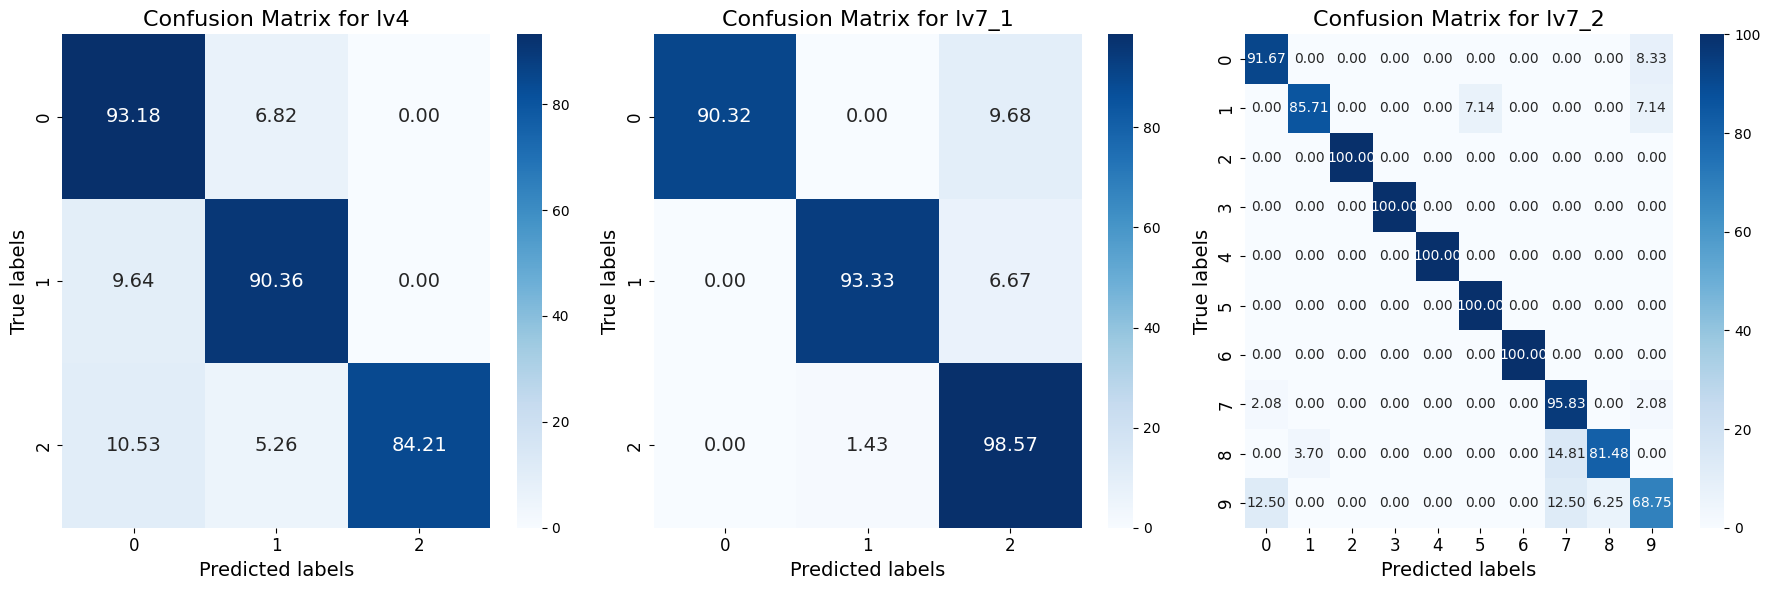

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 함수 정의: 혼동 행렬을 시각화
def plot_confusion_matrix(y_true, y_pred, title, ax, annot_size=14):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100  # 백분율로 변환

    # annot_kws를 사용하여 글씨 크기를 조절
    sns.heatmap(cm_normalized, annot=cm_normalized, fmt='.2f', cmap='Blues', ax=ax, annot_kws={"size": annot_size})

    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Predicted labels', fontsize=14)
    ax.set_ylabel('True labels', fontsize=14)

    # ax.tick_params를 사용하여 레이블 글씨 크기를 조절
    ax.tick_params(axis='both', labelsize=12)

# 시각화를 위한 subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # lv4, lv7_1, lv7_2 세 개를 표시하므로 ncols=3로 설정

columns_to_display = ['lv4', 'lv7_1', 'lv7_2']
annot_sizes = [14, 14, 10]  # lv7_2에 대한 결과값의 글씨 크기를 상대적으로 작게 설정

for idx, (col, size) in enumerate(zip(columns_to_display, annot_sizes)):
    y_true = y_test[col]
    y_pred = trained_models['Support Vector Machine'].predict(X_test)[:, target_columns.index(col)]  # 해당 컬럼의 인덱스로 예측값 가져오기
    plot_confusion_matrix(y_true, y_pred, title=f'Confusion Matrix for {col}', ax=axes[idx], annot_size=size)

plt.tight_layout()
plt.show()